# 군집분석이란?

## 언제 쓰는가?

## 분석기법의 종류

# 군집 갯수 선정

## K-means 및 PAM 군집의 개수 선정

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

In [5]:
# 데이터 준비
data = {
    'X1': [12, 34, 67, 10, 30, 10, 10, 10, 20, 40, 70, 15],
    'X2': [20, 50, 75, 15, 35, 20, 15, 20, 25, 45, 65, 25],
    'X3': [10, 40, 60, 20, 25, 15, 20, 30, 30, 50, 80, 20]
}
df = pd.DataFrame(data)

# 데이터 표준화
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

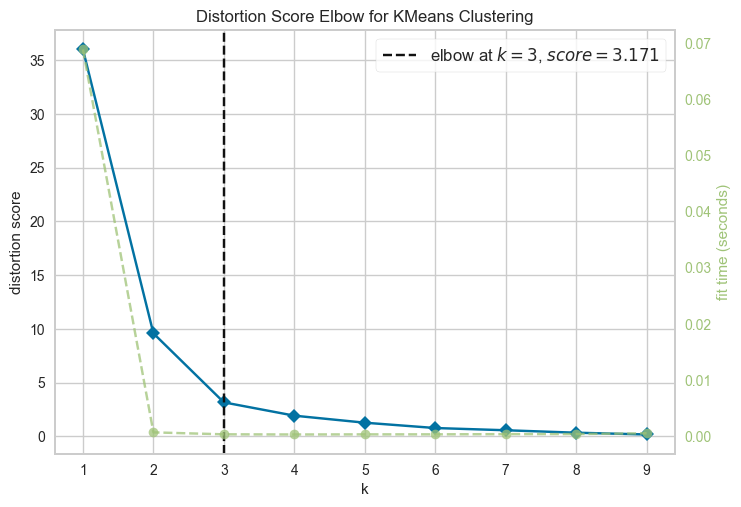

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [6]:
# K-means 군집의 개수 선정
kmeans_model = KMeans()
visualizer = KElbowVisualizer(kmeans_model, k=(1,10))
visualizer.fit(scaled_data)
visualizer.show()

In [9]:
# PAM (K-medoids) 군집의 개수 선정
# kmedoids의 경우, K의 최적값을 시각적으로 평가하기 어렵기 때문에
# K-means의 결과를 참고하여 K 값을 정한 후 PAM 클러스터링 수행
# PAM 클러스터링을 위한 K 값 예시로 3을 선택
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.cluster.kmedoids import manhattan_distance

initial_medoids = [0, 1, 2]  # 임의의 초기 medoids 선택
kmedoids_instance = kmedoids(scaled_data, initial_medoids, metric=manhattan_distance)
kmedoids_instance.process()
clusters = kmedoids_instance.get_clusters()

# 클러스터의 수 시각화
cluster_sizes = [len(cluster) for cluster in clusters]
plt.bar(range(len(cluster_sizes)), cluster_sizes)
plt.xlabel('Cluster')
plt.ylabel('Number of Points')
plt.title('Cluster Sizes for K-medoids')
plt.show()

ImportError: cannot import name 'manhattan_distance' from 'pyclustering.cluster.kmedoids' (/Users/inchoi/Statistics/code4_multivar/myenv/lib/python3.12/site-packages/pyclustering/cluster/kmedoids.py)

## kneed 패키지
* R에서의 `NbClust` 패키지와 비슷한 것.
* 엘보우 방법을 구현하고, 다른 지표를 추가로 확인

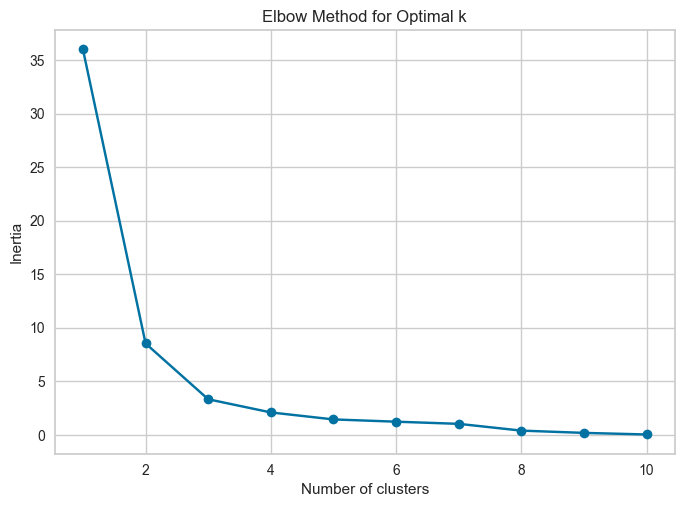

Optimal number of clusters: 3


In [11]:
from kneed import KneeLocator

# K-means 군집의 개수 선정 (엘보우 방법)
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(scaled_data)
    inertia.append(kmeans.inertia_)

# 엘보우 시각화
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# KneeLocator를 사용하여 최적의 k 값 찾기
kneedle = KneeLocator(range(1, 11), inertia, curve='convex', direction='decreasing')
print(f'Optimal number of clusters: {kneedle.elbow}')